In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif, RFE

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc



In [2]:
df = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv")

In [3]:
X = df.drop(columns=['Winner'])
y= df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

#oversampling minority class
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
#xgboost

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("XGBoost")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))



XGBoost
Accuracy:  0.629193109700816
Precision:  0.47974413646055436
Recall:  0.37846930193439865
F1 Score:  0.4231311706629055


In [5]:
#random forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


Random Forest
Accuracy:  0.6313085524327592
Precision:  0.48236632536973834
Recall:  0.3566021867115223
F1 Score:  0.41005802707930367


In [6]:
#kfold cross validation on xgb with parameter tuning

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model_kf = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_model_kf, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best index: ", grid_search.best_index_)



Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score:  0.7486538461538462
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Best index:  27


In [7]:
#predicting on test set with best parameters
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("XGBoost with best parameters")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))



XGBoost with best parameters
Accuracy:  0.6440012088244182
Precision:  0.5063583815028901
Recall:  0.368376787216148
F1 Score:  0.42648490749756574


In [8]:
#kfold cross validation on random forest with parameter tuning

param_grid_rf = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200]
}

rf_model_kf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model_kf, param_grid_rf, cv=kf, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

print("Best parameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)
print("Best estimator: ", grid_search_rf.best_estimator_)
print("Best index: ", grid_search_rf.best_index_)



Best parameters:  {'max_depth': 9, 'n_estimators': 200}
Best score:  0.7113773738269416
Best estimator:  RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)
Best index:  15


In [9]:
#RANDOM FOREST - predicting on test set with best parameters
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest with best parameters")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


Random Forest with best parameters
Accuracy:  0.6440012088244182
Precision:  0.5063583815028901
Recall:  0.368376787216148
F1 Score:  0.42648490749756574


In [10]:
#stratified shuffle split cross validation on xgb with parameter tuning

param_grid_xgb = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.45, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42), 
                               param_grid_xgb, 
                               cv=stratified_kf, 
                               scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

print("XGBoost Best parameters: ", grid_search_xgb.best_params_)
print("XGBoost Best score: ", grid_search_xgb.best_score_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("XGBoost with best parameters")
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Precision: ", precision_score(y_test, y_pred_xgb))
print("Recall: ", recall_score(y_test, y_pred_xgb))
print("F1 Score: ", f1_score(y_test, y_pred_xgb))


XGBoost Best parameters:  {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
XGBoost Best score:  0.7522148723854454
XGBoost with best parameters
Accuracy:  0.6397703233605319
Precision:  0.49595959595959593
Recall:  0.41469594594594594
F1 Score:  0.45170193192272307


In [11]:
#stratified shuffle split cross validation on random forest with parameter tuning
param_grid_rf = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grid_rf, 
                              cv=stratified_kf, 
                              scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Random Forest Best parameters: ", grid_search_rf.best_params_)
print("Random Forest Best score: ", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest with best parameters")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))

Random Forest Best parameters:  {'max_depth': 9, 'n_estimators': 150}
Random Forest Best score:  0.7083187294734635
Random Forest with best parameters
Accuracy:  0.6264732547597461
Precision:  0.47893030794165314
Recall:  0.49915540540540543
F1 Score:  0.48883374689826303


In [12]:

# Define the stratified K-Fold
stratified_kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Logistic Regression with cross-validation
lr_model = LogisticRegressionCV(
    Cs=[0.001, 0.01, 0.1, 1, 10, 100],
    cv=stratified_kf,
    penalty='l2',  # or 'l1' if you're using 'liblinear' solver
    scoring='accuracy',
    random_state=42,
    max_iter=1000
)

# Fit the model
lr_model.fit(X_train, y_train)

# Get the best C value
print("Best C parameter: ", lr_model.C_)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression with best parameters")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("F1 Score: ", f1_score(y_test, y_pred_lr))

Best C parameter:  [10.]
Logistic Regression with best parameters
Accuracy:  0.6548806285886974
Precision:  0.5267175572519084
Recall:  0.34966216216216217
F1 Score:  0.4203045685279188


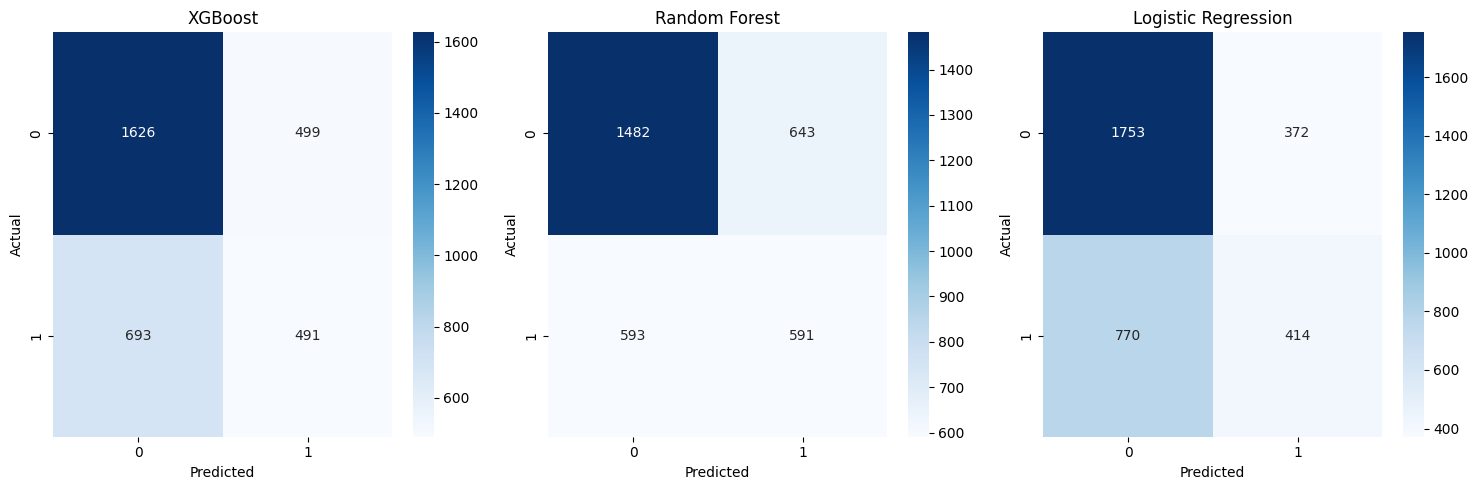

In [13]:
#plot of confusion matrix for xgb, rf, lr

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('XGBoost')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

# Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Logistic Regression')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [14]:

#trying out RFE with xgb

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_features_to_select = 60

rfe = RFE(estimator=best_xgb, n_features_to_select=n_features_to_select, step=1)
X_train_selected = rfe.fit_transform(X_train, y_train)

scores = cross_val_score(best_xgb, X_train_selected, y_train, cv=cv, scoring='accuracy')

print(f"Model performance with {n_features_to_select} features: {scores.mean():.4f} ± {scores.std():.4f}")

best_xgb.fit(X_train_selected, y_train)
X_test_selected = X_test[:, rfe.support_]
y_pred_rfe = best_xgb.predict(X_test_selected)

print("XGBoost with RFE")
print("Accuracy: ", accuracy_score(y_test, y_pred_rfe))
print("Precision: ", precision_score(y_test, y_pred_rfe))
print("Recall: ", recall_score(y_test, y_pred_rfe))
print("F1 Score: ", f1_score(y_test, y_pred_rfe))


Model performance with 60 features: 0.7382 ± 0.0123
XGBoost with RFE
Accuracy:  0.6294953158053793
Precision:  0.4798464491362764
Recall:  0.4222972972972973
F1 Score:  0.44923629829290207


In [15]:
#trying out RFE with xgb

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_features_to_select = 100

rfe = RFE(estimator=best_xgb, n_features_to_select=n_features_to_select, step=1)
X_train_selected = rfe.fit_transform(X_train, y_train)

scores = cross_val_score(best_xgb, X_train_selected, y_train, cv=cv, scoring='accuracy')

print(f"Model performance with {n_features_to_select} features: {scores.mean():.4f} ± {scores.std():.4f}")

best_xgb.fit(X_train_selected, y_train)
X_test_selected = X_test[:, rfe.support_]
y_pred_rfe = best_xgb.predict(X_test_selected)

print("XGBoost with RFE")
print("Accuracy: ", accuracy_score(y_test, y_pred_rfe))
print("Precision: ", precision_score(y_test, y_pred_rfe))
print("Recall: ", recall_score(y_test, y_pred_rfe))
print("F1 Score: ", f1_score(y_test, y_pred_rfe))


Model performance with 100 features: 0.7437 ± 0.0164
XGBoost with RFE
Accuracy:  0.633121789060139
Precision:  0.48430962343096234
Recall:  0.3910472972972973
F1 Score:  0.4327102803738318


In [16]:
#lasso and ridge regression

# Lasso
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso")
print("Accuracy: ", accuracy_score(y_test, y_pred_lasso))
print("Precision: ", precision_score(y_test, y_pred_lasso))
print("Recall: ", recall_score(y_test, y_pred_lasso))
print("F1 Score: ", f1_score(y_test, y_pred_lasso))

# Ridge
ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge")
print("Accuracy: ", accuracy_score(y_test, y_pred_ridge))
print("Precision: ", precision_score(y_test, y_pred_ridge))
print("Recall: ", recall_score(y_test, y_pred_ridge))
print("F1 Score: ", f1_score(y_test, y_pred_ridge))



Lasso
Accuracy:  0.6551828346932608
Precision:  0.5270440251572327
Recall:  0.35388513513513514
F1 Score:  0.42344618494188985
Ridge
Accuracy:  0.6545784224841342
Precision:  0.5257214554579673
Recall:  0.35388513513513514
F1 Score:  0.4230186774356386


In [5]:
#variance inflation factor for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_scaled = StandardScaler().fit_transform(X_train)  # Standardize the data
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)  # Convert to DataFrame

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
vif_threshold = 10

# Extract features with VIF greater than the threshold
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].values

# Output the array of high VIF features
print("Features with high VIF values:", high_vif_features)

c:\Program Files\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Features with high VIF values: ['B_avg_SIG_STR_att' 'B_avg_SIG_STR_landed' 'B_avg_opp_SIG_STR_att'
 'B_avg_opp_SIG_STR_landed' 'B_avg_TOTAL_STR_att' 'B_avg_TOTAL_STR_landed'
 'B_avg_opp_TOTAL_STR_att' 'B_avg_opp_TOTAL_STR_landed' 'B_avg_HEAD_att'
 'B_avg_HEAD_landed' 'B_avg_opp_HEAD_att' 'B_avg_opp_HEAD_landed'
 'B_avg_BODY_att' 'B_avg_BODY_landed' 'B_avg_opp_BODY_att'
 'B_avg_opp_BODY_landed' 'B_avg_LEG_att' 'B_avg_LEG_landed'
 'B_avg_opp_LEG_att' 'B_avg_opp_LEG_landed' 'B_avg_DISTANCE_att'
 'B_avg_DISTANCE_landed' 'B_avg_opp_DISTANCE_att'
 'B_avg_opp_DISTANCE_landed' 'B_avg_CLINCH_att' 'B_avg_CLINCH_landed'
 'B_avg_opp_CLINCH_att' 'B_avg_opp_CLINCH_landed' 'B_avg_GROUND_att'
 'B_avg_GROUND_landed' 'B_avg_opp_GROUND_att' 'B_avg_opp_GROUND_landed'
 'B_total_rounds_fought' 'B_wins' 'B_losses' 'B_win_by_Decision_Unanimous'
 'B_win_by_KO/TKO' 'B_win_by_Submission' 'B_Weight_lbs'
 'R_avg_SIG_STR_att' 'R_avg_SIG_STR_landed' 'R_avg_opp_SIG_STR_att'
 'R_avg_opp_SIG_STR_landed' 'R_avg_TOTAL_ST

In [6]:
#mutual information for feature selection

mi = mutual_info_classif(X_train, y_train, random_state=42)
mi = pd.Series(mi, index=X.columns)
mi.sort_values(ascending=False, inplace=True)



In [ ]:
#values that are

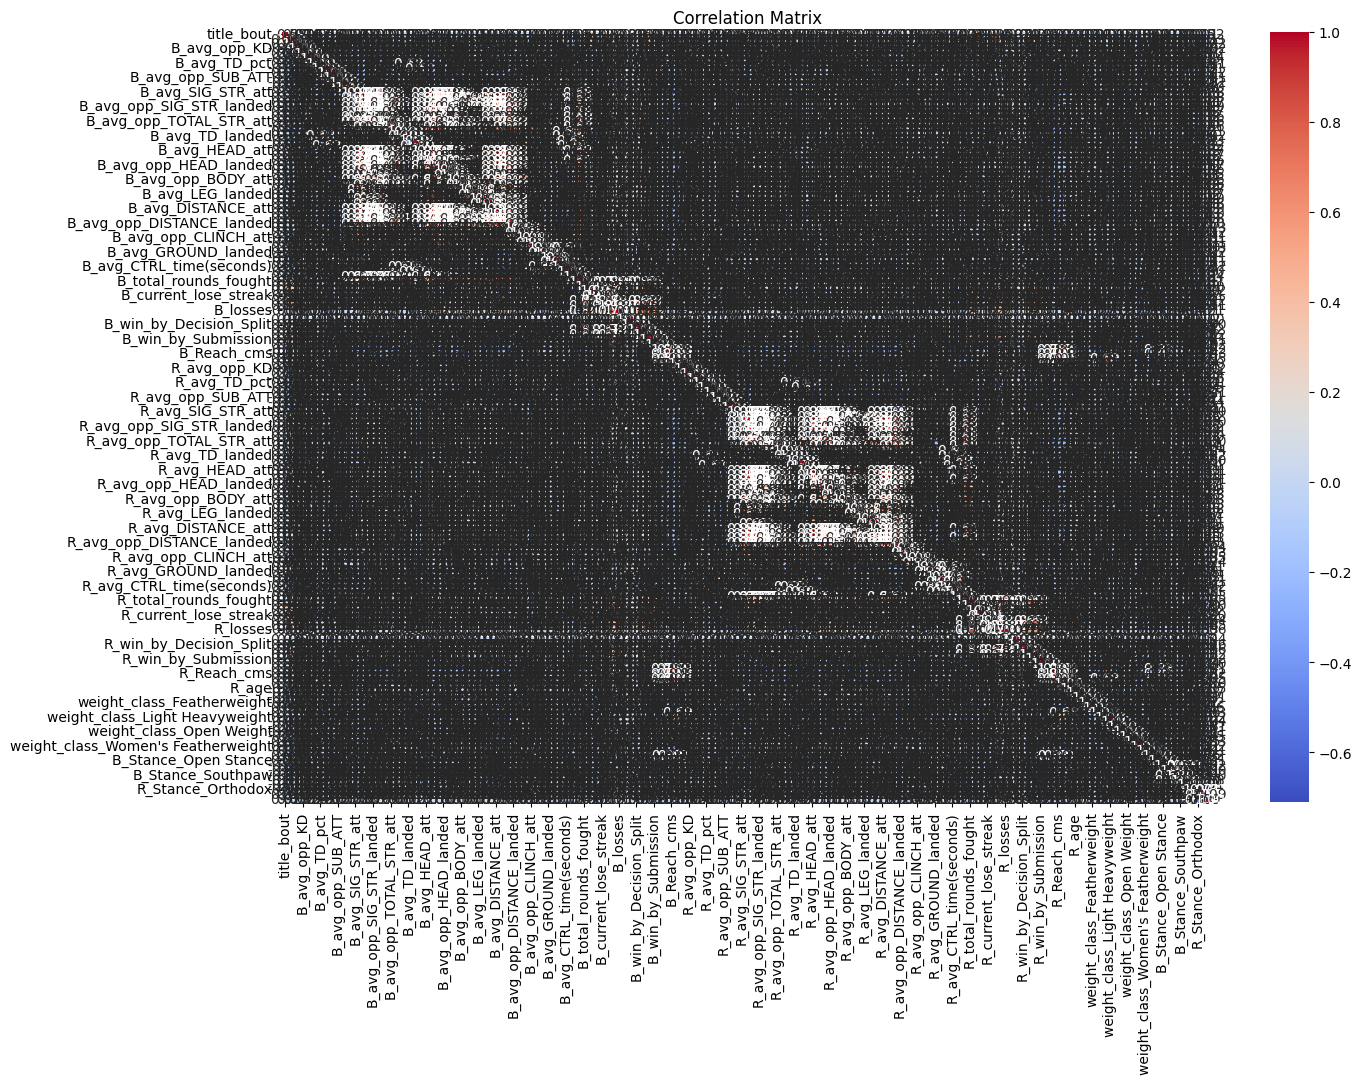

In [18]:
#correlation matrix

corr = X_train_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [19]:
X = df.drop(columns=['Winner'])
y= df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

#oversampling minority class
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [21]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

# Set a VIF threshold to remove features (common thresholds are 5 or 10)
vif_threshold = 5.0

# Identify features with high VIF
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].values

# Remove features with high VIF from the dataset
X_train_reduced = X_train_df.drop(columns=high_vif_features)
X_test_reduced = X_test_df.drop(columns=high_vif_features)

# Output the reduced set of features
print(f"Features removed due to high VIF: {high_vif_features}")
print(f"Remaining features: {X_train_reduced.columns.tolist()}")

c:\Program Files\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Features removed due to high VIF: ['B_avg_SIG_STR_att' 'B_avg_SIG_STR_landed' 'B_avg_opp_SIG_STR_att'
 'B_avg_opp_SIG_STR_landed' 'B_avg_TOTAL_STR_att' 'B_avg_TOTAL_STR_landed'
 'B_avg_opp_TOTAL_STR_att' 'B_avg_opp_TOTAL_STR_landed' 'B_avg_TD_landed'
 'B_avg_opp_TD_landed' 'B_avg_HEAD_att' 'B_avg_HEAD_landed'
 'B_avg_opp_HEAD_att' 'B_avg_opp_HEAD_landed' 'B_avg_BODY_att'
 'B_avg_BODY_landed' 'B_avg_opp_BODY_att' 'B_avg_opp_BODY_landed'
 'B_avg_LEG_att' 'B_avg_LEG_landed' 'B_avg_opp_LEG_att'
 'B_avg_opp_LEG_landed' 'B_avg_DISTANCE_att' 'B_avg_DISTANCE_landed'
 'B_avg_opp_DISTANCE_att' 'B_avg_opp_DISTANCE_landed' 'B_avg_CLINCH_att'
 'B_avg_CLINCH_landed' 'B_avg_opp_CLINCH_att' 'B_avg_opp_CLINCH_landed'
 'B_avg_GROUND_att' 'B_avg_GROUND_landed' 'B_avg_opp_GROUND_att'
 'B_avg_opp_GROUND_landed' 'B_avg_CTRL_time(seconds)'
 'B_avg_opp_CTRL_time(seconds)' 'B_total_time_fought(seconds)'
 'B_total_rounds_fought' 'B_longest_win_streak' 'B_wins' 'B_losses'
 'B_win_by_Decision_Unanimous' 'B_win_by

In [22]:
#trying xgb with reduced features

xgb_model_reduced = xgb.XGBClassifier(random_state=42)

xgb_model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = xgb_model_reduced.predict(X_test_reduced)

print("XGBoost with reduced features")
print("Accuracy: ", accuracy_score(y_test, y_pred_reduced))
print("Precision: ", precision_score(y_test, y_pred_reduced))
print("Recall: ", recall_score(y_test, y_pred_reduced))
print("F1 Score: ", f1_score(y_test, y_pred_reduced))


XGBoost with reduced features
Accuracy:  0.6249622242369296
Precision:  0.47286012526096033
Recall:  0.3809924306139613
F1 Score:  0.42198416394969723


In [23]:
#tree based feature selection

importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_n = 160
top_features = importance_df['Feature'].iloc[:top_n].values

X_train_top = X_train[:, np.isin(features, top_features)]
X_test_top = X_test[:, np.isin(features, top_features)]

xgb_model_top = xgb.XGBClassifier(random_state=42)
xgb_model_top.fit(X_train_top, y_train)

y_pred_top = xgb_model_top.predict(X_test_top)

print("XGBoost with top features")
print("Accuracy: ", accuracy_score(y_test, y_pred_top))
print("Precision: ", precision_score(y_test, y_pred_top))
print("Recall: ", recall_score(y_test, y_pred_top))
print("F1 Score: ", f1_score(y_test, y_pred_top))




XGBoost with top features
Accuracy:  0.6304019341190692
Precision:  0.4816810344827586
Recall:  0.375946173254836
F1 Score:  0.4222957014643363


In [24]:
X = df.drop(columns=['Winner'])
y= df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# Further split training data into proper training and calibration sets
X_train_proper, X_calibration, y_train_proper, y_calibration = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_proper_scaled = scaler.fit_transform(X_train_proper)
X_calibration_scaled = scaler.transform(X_calibration)
X_test_scaled = scaler.transform(X_test)

# Train the model on the proper training set
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_proper_scaled, y_train_proper)

# Get the prediction probabilities on the calibration set
calibration_probs = xgb_model.predict_proba(X_calibration_scaled)

# Calculate the nonconformity scores
# For binary classification, the nonconformity score can be based on the predicted probability of the true class
nonconformity_scores = 1 - calibration_probs[np.arange(len(y_calibration)), y_calibration]

# Determine the quantile for the desired confidence level
confidence_level = 0.90
q_hat = np.quantile(nonconformity_scores, confidence_level)

# Predict on the test set
test_probs = xgb_model.predict_proba(X_test_scaled)

# Generate prediction sets
# For each test instance, include a class in the prediction set if its probability is high enough
prediction_sets = [np.where(probs >= (1 - q_hat))[0] for probs in test_probs]

# Evaluate the predictions
# You can evaluate how often the true label falls within the prediction set
coverage = np.mean([y_test.iloc[i] in prediction_set for i, prediction_set in enumerate(prediction_sets)])

print(f"Coverage of the prediction sets: {coverage:.2f}")

# Optional: Print some prediction sets for inspection
for i, pred_set in enumerate(prediction_sets[:30]):
    print(f"Instance {i} - True label: {y_test.iloc[i]}, Prediction set: {pred_set}")

Coverage of the prediction sets: 0.91
Instance 0 - True label: 1, Prediction set: [0 1]
Instance 1 - True label: 0, Prediction set: [0]
Instance 2 - True label: 1, Prediction set: [0]
Instance 3 - True label: 1, Prediction set: [0]
Instance 4 - True label: 0, Prediction set: [0 1]
Instance 5 - True label: 1, Prediction set: [0 1]
Instance 6 - True label: 0, Prediction set: [0 1]
Instance 7 - True label: 1, Prediction set: [0 1]
Instance 8 - True label: 0, Prediction set: [0]
Instance 9 - True label: 0, Prediction set: [0]
Instance 10 - True label: 1, Prediction set: [0 1]
Instance 11 - True label: 0, Prediction set: [0]
Instance 12 - True label: 1, Prediction set: [0]
Instance 13 - True label: 1, Prediction set: [0 1]
Instance 14 - True label: 1, Prediction set: [0 1]
Instance 15 - True label: 0, Prediction set: [0]
Instance 16 - True label: 0, Prediction set: [0]
Instance 17 - True label: 1, Prediction set: [0]
Instance 18 - True label: 0, Prediction set: [0 1]
Instance 19 - True labe

XGBoost
Accuracy: 0.6259
Precision: 0.4734
Recall: 0.3667
F1 Score: 0.4133
Random Forest
Accuracy: 0.6343
Precision: 0.4880
Recall: 0.3600
F1 Score: 0.4143
XGBoost with Best Parameters
Accuracy: 0.6395
Precision: 0.4977
Recall: 0.3692
F1 Score: 0.4239
Logistic Regression with Best Parameters
Accuracy: 0.6579
Precision: 0.5392
Recall: 0.3297
F1 Score: 0.4092


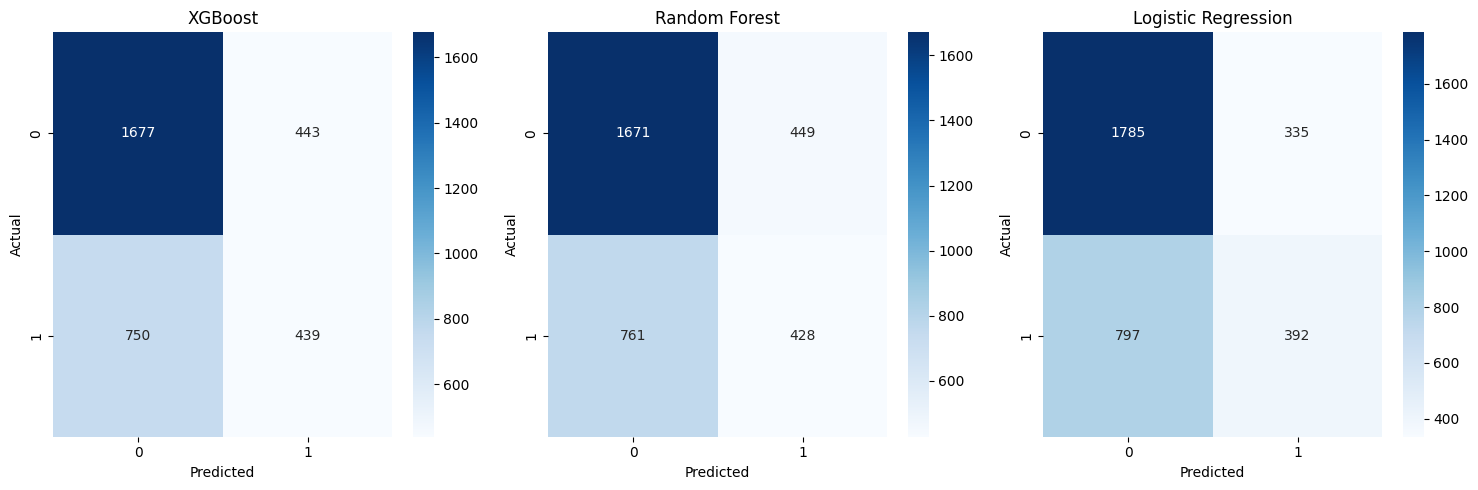

XGBoost with RFE
Accuracy: 0.6358
Precision: 0.4908
Recall: 0.3608
F1 Score: 0.4159


c:\Program Files\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Features removed due to high VIF: ['B_avg_SIG_STR_att' 'B_avg_SIG_STR_landed' 'B_avg_opp_SIG_STR_att'
 'B_avg_opp_SIG_STR_landed' 'B_avg_TOTAL_STR_att' 'B_avg_TOTAL_STR_landed'
 'B_avg_opp_TOTAL_STR_att' 'B_avg_opp_TOTAL_STR_landed' 'B_avg_TD_landed'
 'B_avg_opp_TD_landed' 'B_avg_HEAD_att' 'B_avg_HEAD_landed'
 'B_avg_opp_HEAD_att' 'B_avg_opp_HEAD_landed' 'B_avg_BODY_att'
 'B_avg_BODY_landed' 'B_avg_opp_BODY_att' 'B_avg_opp_BODY_landed'
 'B_avg_LEG_att' 'B_avg_LEG_landed' 'B_avg_opp_LEG_att'
 'B_avg_opp_LEG_landed' 'B_avg_DISTANCE_att' 'B_avg_DISTANCE_landed'
 'B_avg_opp_DISTANCE_att' 'B_avg_opp_DISTANCE_landed' 'B_avg_CLINCH_att'
 'B_avg_CLINCH_landed' 'B_avg_opp_CLINCH_att' 'B_avg_opp_CLINCH_landed'
 'B_avg_GROUND_att' 'B_avg_GROUND_landed' 'B_avg_opp_GROUND_att'
 'B_avg_opp_GROUND_landed' 'B_avg_CTRL_time(seconds)'
 'B_avg_opp_CTRL_time(seconds)' 'B_total_time_fought(seconds)'
 'B_total_rounds_fought' 'B_longest_win_streak' 'B_wins' 'B_losses'
 'B_win_by_Decision_Unanimous' 'B_win_by

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load and split data
df = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv")
X = df.drop(columns=['Winner'])
y = df['Winner']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# Oversampling minority class
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation with XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

print("XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Random Forest Training and Evaluation
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

# Hyperparameter Tuning with K-Fold Cross Validation for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid_xgb, cv=kf, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("XGBoost with Best Parameters")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

# Logistic Regression with Cross Validation
stratified_kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
lr_model = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], cv=stratified_kf, scoring='accuracy', random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression with Best Parameters")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

# Confusion Matrix Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
models = [('XGBoost', y_pred_xgb), ('Random Forest', y_pred_rf), ('Logistic Regression', y_pred_lr)]
for i, (name, pred) in enumerate(models):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[i])
    ax[i].set_title(name)
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Recursive Feature Elimination (RFE) with XGBoost
n_features_to_select = 60
rfe = RFE(estimator=best_xgb, n_features_to_select=n_features_to_select, step=1)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = X_test_scaled[:, rfe.support_]
best_xgb.fit(X_train_selected, y_train)
y_pred_rfe = best_xgb.predict(X_test_selected)

print("XGBoost with RFE")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rfe):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rfe):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rfe):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rfe):.4f}")

# Variance Inflation Factor (VIF) for Multicollinearity
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

# Set a VIF threshold to remove features (common thresholds are 5 or 10)
vif_threshold = 5.0

# Identify and remove high VIF features
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].values
X_train_reduced = X_train_df.drop(columns=high_vif_features)
X_test_reduced = pd.DataFrame(X_test_scaled, columns=X.columns).drop(columns=high_vif_features)

print(f"Features removed due to high VIF: {high_vif_features}")
print(f"Remaining features: {X_train_reduced.columns.tolist()}")

# XGBoost with Reduced Features
xgb_model_reduced = xgb.XGBClassifier(random_state=42)
xgb_model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = xgb_model_reduced.predict(X_test_reduced)

print("XGBoost with Reduced Features")
print(f"Accuracy: {accuracy_score(y_test, y_pred_reduced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_reduced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_reduced):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_reduced):.4f}")

# Conformal Prediction
X_train_proper, X_calibration, y_train_proper, y_calibration = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_proper_scaled = scaler.fit_transform(X_train_proper)
X_calibration_scaled = scaler.transform(X_calibration)
X_test_scaled = scaler.transform(X_test)

# Train on the proper training set and predict
best_xgb.fit(X_train_proper_scaled, y_train_proper)
calibration_probs = best_xgb.predict_proba(X_calibration_scaled)
nonconformity_scores = 1 - calibration_probs[np.arange(len(y_calibration)), y_calibration]

# Determine the quantile for the desired confidence level
confidence_level = 0.90
q_hat = np.quantile(nonconformity_scores, confidence_level)

# Predict on the test set
test_probs = best_xgb.predict_proba(X_test_scaled)
prediction_sets = [np.where(probs >= (1 - q_hat))[0] for probs in test_probs]

# Evaluate the coverage
coverage = np.mean([y_test.iloc[i] in prediction_set for i, prediction_set in enumerate(prediction_sets)])
print(f"Coverage of the prediction sets: {coverage:.2f}")

# Optional: Print some prediction sets for inspection
for i, pred_set in enumerate(prediction_sets[:30]):
    print(f"Instance {i} - True label: {y_test.iloc[i]}, Prediction set: {pred_set}")


XGBoost
Accuracy: 0.6337
Precision: 0.4876
Recall: 0.3802
F1 Score: 0.4272
Random Forest
Accuracy: 0.6274
Precision: 0.4753
Recall: 0.3566
F1 Score: 0.4075
XGBoost with Best Parameters
Accuracy: 0.6461
Precision: 0.5103
Recall: 0.3751
F1 Score: 0.4324
Logistic Regression with Best Parameters
Accuracy: 0.6576
Precision: 0.5380
Recall: 0.3331
F1 Score: 0.4114


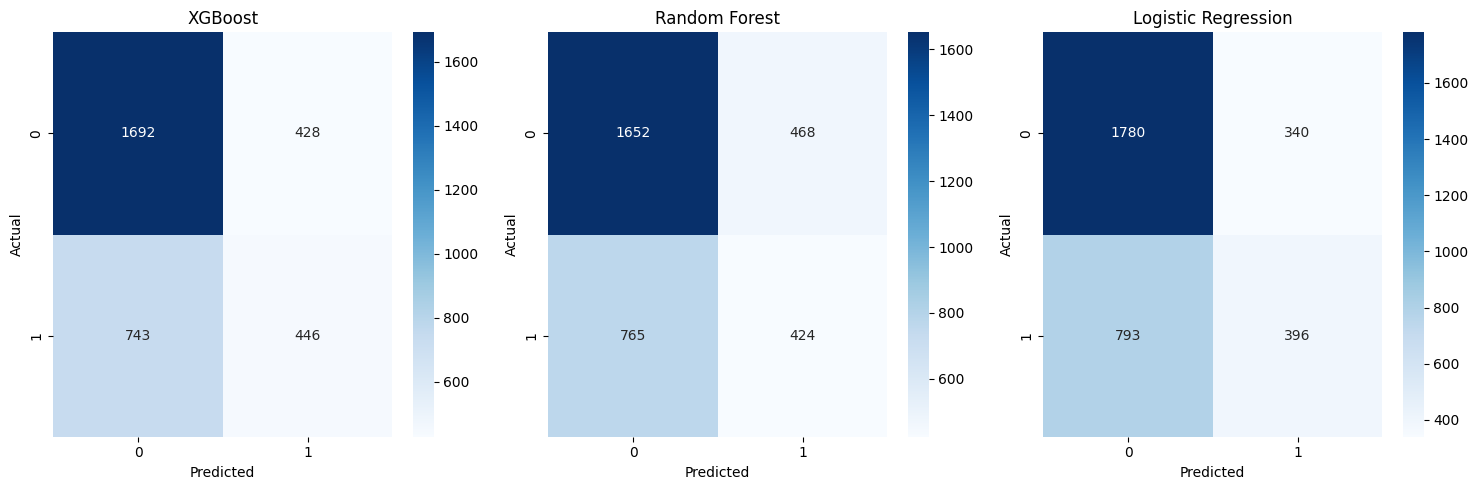

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

df = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv")
X = df.drop(columns=['Winner'])
y = df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

print("XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

param_grid_xgb = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid_xgb, cv=kf, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("XGBoost with Best Parameters")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

stratified_kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
lr_model = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], cv=stratified_kf, scoring='accuracy', random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression with Best Parameters")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
models = [('XGBoost', y_pred_xgb), ('Random Forest', y_pred_rf), ('Logistic Regression', y_pred_lr)]
for i, (name, pred) in enumerate(models):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[i])
    ax[i].set_title(name)
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

X_train_proper, X_calibration, y_train_proper, y_calibration = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_proper_scaled = scaler.fit_transform(X_train_proper)
X_calibration_scaled = scaler.transform(X_calibration)
X_test_scaled = scaler.transform(X_test)

best_xgb.fit(X_train_proper_scaled, y_train_proper)
calibration_probs = best_xgb.predict_proba(X_calibration_scaled)
nonconformity_scores = 1 - calibration_probs[np.arange(len(y_calibration)), y_calibration]



In [27]:
confidence_level = 0.80
q_hat = np.quantile(nonconformity_scores, confidence_level)

test_probs = best_xgb.predict_proba(X_test_scaled)
prediction_sets = [np.where(probs >= (1 - q_hat))[0] for probs in test_probs]

coverage = np.mean([y_test.iloc[i] in prediction_set for i, prediction_set in enumerate(prediction_sets)])
print(f"Coverage of the prediction sets: {coverage:.2f}")

for i, pred_set in enumerate(prediction_sets[:30]):
    print(f"Instance {i} - True label: {y_test.iloc[i]}, Prediction set: {pred_set}")


Coverage of the prediction sets: 0.71
Instance 0 - True label: 1, Prediction set: [1]
Instance 1 - True label: 0, Prediction set: [0]
Instance 2 - True label: 1, Prediction set: [0]
Instance 3 - True label: 1, Prediction set: [0]
Instance 4 - True label: 0, Prediction set: [0]
Instance 5 - True label: 1, Prediction set: [0]
Instance 6 - True label: 0, Prediction set: [0]
Instance 7 - True label: 1, Prediction set: [0 1]
Instance 8 - True label: 0, Prediction set: [0]
Instance 9 - True label: 0, Prediction set: [0]
Instance 10 - True label: 1, Prediction set: [0 1]
Instance 11 - True label: 0, Prediction set: [0]
Instance 12 - True label: 1, Prediction set: [0 1]
Instance 13 - True label: 1, Prediction set: [0 1]
Instance 14 - True label: 1, Prediction set: [0]
Instance 15 - True label: 0, Prediction set: [0]
Instance 16 - True label: 0, Prediction set: [0]
Instance 17 - True label: 1, Prediction set: [0]
Instance 18 - True label: 0, Prediction set: [1]
Instance 19 - True label: 1, Pred

In [28]:
lr_model.fit(X_train_proper_scaled, y_train_proper)
calibration_probs_lr = lr_model.predict_proba(X_calibration_scaled)
nonconformity_scores_lr = 1 - calibration_probs_lr[np.arange(len(y_calibration)), y_calibration]

q_hat_lr = np.quantile(nonconformity_scores_lr, confidence_level)

test_probs_lr = lr_model.predict_proba(X_test_scaled)
prediction_sets_lr = [np.where(probs >= (1 - q_hat_lr))[0] for probs in test_probs_lr]

coverage_lr = np.mean([y_test.iloc[i] in prediction_set for i, prediction_set in enumerate(prediction_sets_lr)])
print(f"Coverage of the prediction sets (Logistic Regression): {coverage_lr:.2f}")

for i, pred_set in enumerate(prediction_sets_lr[:50]):
    print(f"Instance {i} - True label: {y_test.iloc[i]}, Prediction set: {pred_set}")



Coverage of the prediction sets (Logistic Regression): 0.72
Instance 0 - True label: 1, Prediction set: [0 1]
Instance 1 - True label: 0, Prediction set: [0]
Instance 2 - True label: 1, Prediction set: [0]
Instance 3 - True label: 1, Prediction set: [0]
Instance 4 - True label: 0, Prediction set: [0]
Instance 5 - True label: 1, Prediction set: [0 1]
Instance 6 - True label: 0, Prediction set: [0]
Instance 7 - True label: 1, Prediction set: [1]
Instance 8 - True label: 0, Prediction set: [0]
Instance 9 - True label: 0, Prediction set: [0]
Instance 10 - True label: 1, Prediction set: [0]
Instance 11 - True label: 0, Prediction set: [0 1]
Instance 12 - True label: 1, Prediction set: [0]
Instance 13 - True label: 1, Prediction set: [0]
Instance 14 - True label: 1, Prediction set: [0]
Instance 15 - True label: 0, Prediction set: [0]
Instance 16 - True label: 0, Prediction set: [0]
Instance 17 - True label: 1, Prediction set: [0]
Instance 18 - True label: 0, Prediction set: [1]
Instance 19 -

In [29]:
rf_model.fit(X_train_proper_scaled, y_train_proper)
calibration_probs_rf = rf_model.predict_proba(X_calibration_scaled)
nonconformity_scores_rf = 1 - calibration_probs_rf[np.arange(len(y_calibration)), y_calibration]

q_hat_rf = np.quantile(nonconformity_scores_rf, confidence_level)

test_probs_rf = rf_model.predict_proba(X_test_scaled)
prediction_sets_rf = [np.where(probs >= (1 - q_hat_rf))[0] for probs in test_probs_rf]

coverage_rf = np.mean([y_test.iloc[i] in prediction_set for i, prediction_set in enumerate(prediction_sets_rf)])
print(f"Coverage of the prediction sets (Random Forest): {coverage_rf:.2f}")

for i, pred_set in enumerate(prediction_sets_rf[:50]):
    print(f"Instance {i} - True label: {y_test.iloc[i]}, Prediction set: {pred_set}")

Coverage of the prediction sets (Random Forest): 0.68
Instance 0 - True label: 1, Prediction set: [1]
Instance 1 - True label: 0, Prediction set: [0]
Instance 2 - True label: 1, Prediction set: [0]
Instance 3 - True label: 1, Prediction set: [0]
Instance 4 - True label: 0, Prediction set: [0]
Instance 5 - True label: 1, Prediction set: [0 1]
Instance 6 - True label: 0, Prediction set: [1]
Instance 7 - True label: 1, Prediction set: [1]
Instance 8 - True label: 0, Prediction set: [0 1]
Instance 9 - True label: 0, Prediction set: [0]
Instance 10 - True label: 1, Prediction set: [0 1]
Instance 11 - True label: 0, Prediction set: [0]
Instance 12 - True label: 1, Prediction set: [1]
Instance 13 - True label: 1, Prediction set: [1]
Instance 14 - True label: 1, Prediction set: [1]
Instance 15 - True label: 0, Prediction set: [0]
Instance 16 - True label: 0, Prediction set: [0]
Instance 17 - True label: 1, Prediction set: [0]
Instance 18 - True label: 0, Prediction set: [1]
Instance 19 - True 

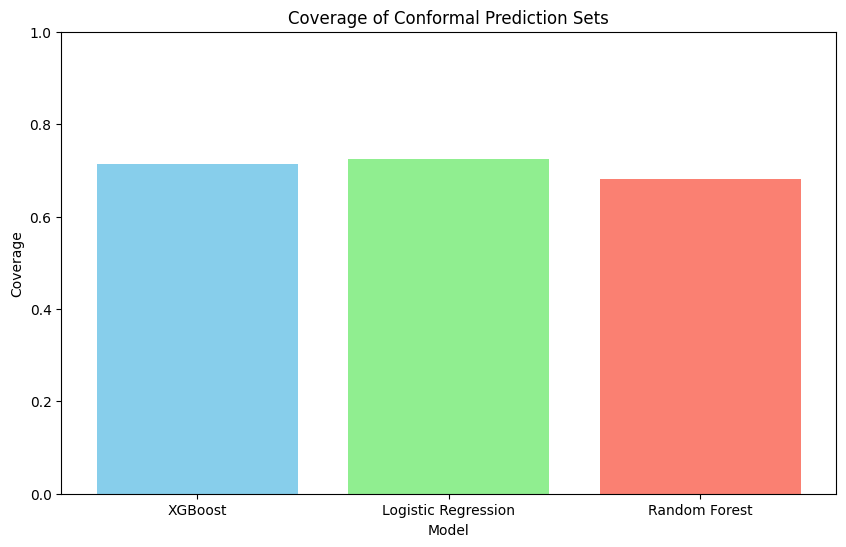

In [30]:
import matplotlib.pyplot as plt

# Calculate coverage for each model
coverage_dict = {
    'XGBoost': coverage,
    'Logistic Regression': coverage_lr,
    'Random Forest': coverage_rf
}

# Plotting the coverage
plt.figure(figsize=(10, 6))
plt.bar(coverage_dict.keys(), coverage_dict.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Coverage')
plt.title('Coverage of Conformal Prediction Sets')
plt.show()
